In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
%matplotlib notebook

In [190]:
def eqDif(q, t, params):
    x, B, y, N, z, D = q
    M, G, l = params
    dervis = [B, ((-3/4)*G*M*(l**2)/(x**4))*(np.cos(y-z))-(G*M/(x**2))*(1+0.375*((l*np.cos(y-z)/x)**2))+x*(N**2), N, (-2/x)*B*N-(3/8)*G*M*(l**2)*np.sin(2*(y-z))*(1/x**5), D, (3/4)*np.sin(2*(y-z))*(1/x**3)]
    return dervis
plt.ioff()
M = 5*10**26
G = 6.674 * 10**(-11)
l = 300000
m = 5*10**18 
params = [M, G, l]

t = np.linspace(0, 10000000/2, 600000)

In [214]:
n=3
dw=0.0000001
q0 = [1500000000, 0, 0, 0.0000001+n*dw, 0.01, 0.0000001]
sol = odeint(eqDif, q0, t, args=(params,))

<IPython.core.display.Javascript object>


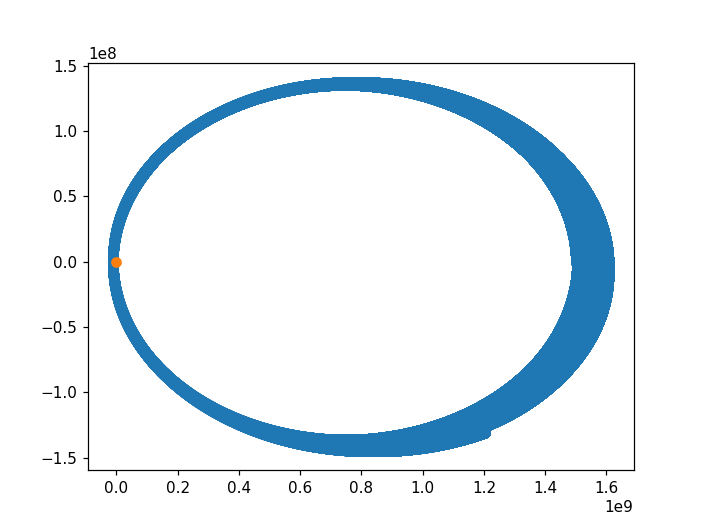

In [230]:
plt.plot(np.cos(sol[:,2])*sol[:,0]+l*np.cos(sol[:,4]),np.sin(sol[:,2])*sol[:,0]+l*np.sin(sol[:,4]), "o")
plt.plot(0,0,"o")
plt.show()

In [13]:
def l2p(x):
    if (x>2*np.pi):
        x = l2p(x-2*np.pi)
    elif(x<0):
        x = l2p(x+2*np.pi)
    return x

In [219]:
def analizador():
    i=1
    a=1
    lista=[]
    p=0
    puntos=[]
    while(i<np.size(sol[:,2])):
        if(l2p(sol[i-1,2])>l2p(sol[i,2])):
            check= np.sqrt((sol[0,4]*-sol[i,4])**2)
            if(check<1.6666694444469193e-02):
                puntos.append(a)
                puntos.append(q0[3])
                puntos.append(i)
                lista.append(puntos)
                puntos=[]
                i=np.size(sol[:,2])
            a=a+1            
        i= i + 1
    return lista

In [220]:
analizador()

[[1, 4e-07, 86162]]

In [153]:
angulo=list(map(l2p,sol[:,2]))

<IPython.core.display.Javascript object>


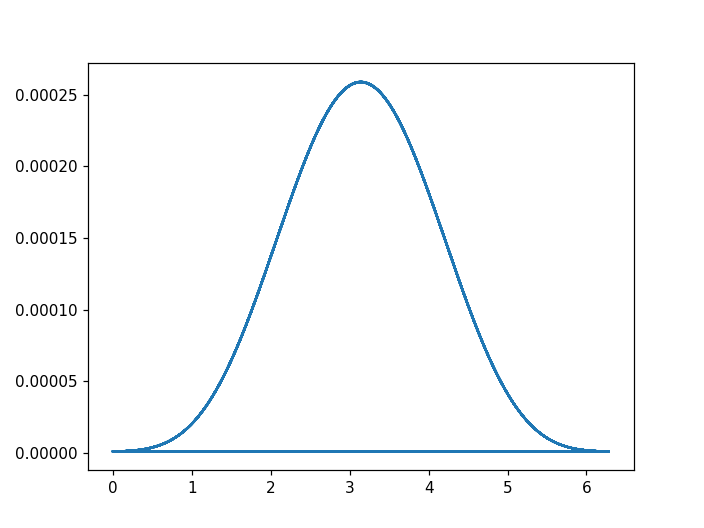

In [154]:
plt.plot(angulo,sol[:,3])
plt.show()

In [233]:
q0=0
def integrador(n):
    dw=0.0000001
    q0 = [1500000000, 0, 0, 0.0000001+(n+1)*dw, 0.01, 0.0000001]
    return odeint(eqDif, q0, t, args=(params,))

In [234]:
def pointcare(m):
    poincaremap =[]
    for l in range(m):
        sol = integrador(l)
        lista = analizador()
        poincaremap.append(lista)
    return poincaremap

In [235]:
suerte =pointcare(20)

TypeError: 'int' object is not subscriptable

In [236]:
suerte

[[[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]],
 [[1, 4e-07, 86162]]]